Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [322]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [323]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [324]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [325]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [326]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [327]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [328]:
df

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,California,1/18/2016,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,California,1/24/2016,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Carnitas,1/24/2016,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Asada,1/24/2016,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,California,1/27/2016,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Other,8/27/2019,NaN,NaN,NaN,6.00,1.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
419,Other,8/27/2019,NaN,NaN,NaN,6.00,4.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
420,California,8/27/2019,NaN,NaN,NaN,7.90,3.0,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
421,Other,8/27/2019,NaN,NaN,NaN,7.90,3.0,NaN,NaN,22.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [329]:
#df['Great'] *= 1
import numpy as np

In [330]:
#Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.

In [331]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [332]:
train = df[(df['Date'] < '2016-12-31 23:59:59')]

In [333]:
val = df[(df['Date'] > '2017-01-01 00:00:00') & (df['Date'] <= '2017-12-31 23:59:59')]

In [334]:
test = df[(df['Date'] > '2018-01-01 00:00:00') & (df['Date'] <= '2018-12-31 23:59:59')]

In [335]:
train.shape, val.shape, test.shape

((298, 59), (85, 59), (27, 59))

In [336]:
#Begin with baselines for classification.

In [337]:
target = "Great"
y_train = train[target]
y_train.value_counts(normalize=True)

False    0.590604
True     0.409396
Name: Great, dtype: float64

In [338]:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class]*len(y_train)

In [339]:
from sklearn.metrics import  accuracy_score

accuracy_score(y_train, y_pred_train)

0.5906040268456376

In [340]:
y_val = val[target]
y_pred = [majority_class]*len(y_val)
accuracy_score(y_val, y_pred)

0.5529411764705883

In [341]:
train.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
count,71.000000,71.000000,292.000000,297.000000,0.0,0.0,175.000000,174.000000,174.000000,298.000000,283.000000,288.000000,297.000000,292.000000,296.000000,278.000000,296.000000,296.000000,0.0
mean,3.897183,4.142254,6.896781,3.445286,NaN,NaN,19.829886,22.042241,0.770920,3.472315,3.706360,3.551215,3.519024,3.528870,3.395946,3.324640,3.540203,3.955068,NaN
std,0.478680,0.371738,1.211412,0.852150,NaN,NaN,2.081275,1.685043,0.137833,0.797606,0.991897,0.869483,0.850348,1.040457,1.089044,0.971226,0.922426,1.167341,NaN
min,2.500000,2.900000,2.990000,0.500000,NaN,NaN,15.000000,17.000000,0.400000,1.400000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,NaN,NaN,18.500000,21.000000,0.662500,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,2.500000,3.000000,3.500000,NaN
50%,4.000000,4.200000,6.850000,3.500000,NaN,NaN,19.500000,22.000000,0.750000,3.500000,4.000000,3.500000,3.500000,4.000000,3.500000,3.500000,3.750000,4.000000,NaN
75%,4.000000,4.400000,7.500000,4.000000,NaN,NaN,21.000000,23.000000,0.870000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN
max,4.500000,4.900000,11.950000,5.000000,NaN,NaN,26.000000,27.000000,1.240000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [342]:
# 1. Import estimator class
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
linear_reg = LinearRegression()

# 3. Arrange X feature matrices (already did y target vectors)
features = ['Cost', 'Volume', 'Fillings']
X_train = train[features]
X_val = val[features]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 4. Fit the model
linear_reg.fit(X_train_imputed, y_train)

# 5. Apply the model to new data.
# The predictions look like this ...
linear_reg.predict(X_val_imputed)

array([ 0.39817923,  0.57105777,  0.26321334,  0.25607833,  0.03413256,
        0.41895463,  0.56382587,  0.54104749, -0.08694018,  0.39651781,
        0.50538112,  0.40439652,  0.59502381,  0.40215422,  0.57232951,
        0.58538551,  0.48968428,  0.57885774,  0.56398984,  0.58954647,
        0.58954647,  0.26327945,  0.24688233,  0.58298763,  0.72878033,
        0.55590178,  0.68878363,  0.37090299,  0.54103388,  0.40698919,
        0.48415366,  0.23478476,  0.23557286,  0.242331  ,  0.34985408,
        0.34985408,  0.22214067,  0.39231595,  0.49051253,  0.44566446,
        0.26722383,  0.47791716,  0.20236741,  0.53731148,  0.38967088,
        0.36804483, -0.22759159,  0.07114564,  0.58743317, -0.11660081,
        0.07773981,  0.40244702,  0.58950679,  0.6043747 ,  0.39904348,
        0.25051692,  0.2192963 ,  0.39329088,  0.21095095,  0.39734577,
       -0.13069779,  0.4172352 ,  0.23427453,  0.40727736,  0.5832895 ,
        0.59950903,  0.41280345,  0.88676925,  0.24183098,  0.41

In [343]:
features

['Cost', 'Volume', 'Fillings']

In [344]:
pd.Series(linear_reg.coef_, features)

Cost        0.016397
Volume     -0.135163
Fillings    0.340351
dtype: float64

In [345]:
test_case = [[6.85, 0.75, 3.5]] # 50% std Cost, Volume, Fillings
linear_reg.predict(test_case)

array([0.40498176])

In [346]:
#Use scikit-learn for logistic regression.

In [347]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_imputed, y_train)
print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))
# same thing
# y_pred = log_reg.predict(X_val_imputed)
# print('Validation Accuracy', accuracy_score(y_pred, y_val))

Validation Accuracy 0.8470588235294118


In [348]:
# The predictions look like this
log_reg.predict(X_val_imputed)

array([False,  True, False, False, False, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True, False,  True,  True])

In [349]:
log_reg.predict(test_case)

array([False])

In [350]:
log_reg.predict_proba(test_case)[0]

array([0.66080286, 0.33919714])

In [351]:
# What's the math?
log_reg.coef_

array([[ 0.12243296, -0.21696359,  2.13602033]])

In [352]:
log_reg.intercept_

array([-8.8188883])

In [353]:
# The logistic sigmoid 'squishing' function, implemented to accept numpy arrays
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [354]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[0.33919714]])

In [355]:
1 - sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[0.66080286]])

In [356]:
features = ['Yelp',	'Google', 'Cost', 'Hunger',	'Mass (g)',	'Density (g/mL)', 'Length',	'Circum', 'Volume',	'Tortilla',	'Temp',
            'Meat',	'Fillings',	'Meat:filling',	'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Queso']
target = 'Great'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

X_train.shape, X_val.shape

((298, 19), (85, 19))

In [357]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [358]:
encoder = ce.one_hot.OneHotEncoder(use_cat_names=True)
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.transform(X_val)
X_train_enc.shape, X_val_enc.shape

((298, 19), (85, 19))

In [359]:
X_val_enc.head()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
301,NaN,NaN,6.60,NaN,NaN,NaN,23.0,20.5,0.77,4.0,4.5,4.0,3.5,3.5,5.0,1.5,3.50,4.5,NaN
302,NaN,NaN,6.60,NaN,NaN,NaN,20.5,21.5,0.75,4.0,2.0,NaN,4.0,NaN,4.6,4.2,3.75,5.0,NaN
303,NaN,NaN,8.50,3.9,NaN,NaN,21.0,21.0,0.74,3.0,4.5,4.1,3.0,3.7,4.0,4.3,4.20,5.0,NaN
304,NaN,NaN,7.90,4.0,NaN,NaN,20.5,21.0,0.72,3.5,4.0,4.0,3.0,4.0,4.5,4.0,3.80,4.8,NaN
305,NaN,NaN,4.99,3.5,NaN,NaN,18.5,22.5,0.75,2.5,4.5,3.0,2.5,3.0,3.0,2.0,2.00,4.0,NaN


In [360]:
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train_enc)
X_val_imp = imputer.transform(X_val_enc)
X_train_imp.shape, X_val_imp.shape

((298, 16), (85, 16))

In [361]:
X_train_imp = pd.DataFrame(X_train_imp, columns = X_train_enc.columns)
X_val_imp = pd.DataFrame(X_val_imp, columns = X_val_enc.columns)

ValueError: Shape of passed values is (298, 16), indices imply (298, 19)

In [362]:
X_val_imp

array([[ 3.8971831 ,  4.14225352,  6.6       , ...,  1.5       ,
         3.5       ,  4.5       ],
       [ 3.8971831 ,  4.14225352,  6.6       , ...,  4.2       ,
         3.75      ,  5.        ],
       [ 3.8971831 ,  4.14225352,  8.5       , ...,  4.3       ,
         4.2       ,  5.        ],
       ...,
       [ 4.        ,  4.5       , 11.5       , ...,  3.5       ,
         4.        ,  2.        ],
       [ 3.8971831 ,  4.14225352,  7.89      , ...,  3.5       ,
         4.3       ,  4.5       ],
       [ 3.8971831 ,  4.14225352,  7.89      , ...,  5.        ,
         5.        ,  3.        ]])

In [363]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_imp)
X_val_sc = scaler.transform(X_val_imp)

In [364]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_enc.columns)
X_val_sc = pd.DataFrame(X_val_sc, columns = X_val_enc.columns)

ValueError: Shape of passed values is (298, 16), indices imply (298, 19)

In [365]:
X_train_sc.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [366]:
model = LogisticRegressionCV()
model.fit(X_train_sc, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [367]:
#Get your model's validation accuracy. (Multiple times if you try multiple iterations.)

In [368]:
print(f'Validaton score: {model.score(X_val_sc, y_val)}')

Validaton score: 0.8823529411764706


In [369]:
# Plot coefficients:

In [370]:
coefs = pd.Series(model.coef_[0], X_train_sc.columns)
coefs

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

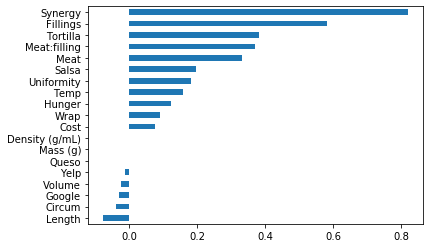

In [371]:
coefs.sort_values().plot.barh()

In [372]:
#Get your model's test accuracy. (One time, at the end.)

In [ ]:
X_test = test[features]
X_test_enc = encoder.transform(X_test)
X_test_imp = imputer.transform(X_test_enc)
X_test_scaled = scaler.transform(X_test_imp)
X_test_scaled

In [373]:
y_pred = model.predict(X_test_scaled)
y_pred

array([ True, False,  True, False, False,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False,  True])

In [374]:
model = LogisticRegressionCV()
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [377]:
print(f'Test score: {model.score(X_test_scaled, y_pred)}')

Validation score: 0.9259259259259259
